# Solution for extra credit

In [1]:
%pylab inline
data_dir = "./Data/Weather/"
# !ls -l $data_dir
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'STAT.pickle','r'))

Populating the interactive namespace from numpy and matplotlib


In [53]:
import pickle
Data=pickle.load(open('./Data/Weather/SampleStations.pickle','r'))

FlatData=[]
for station in Data:
    stationname=station[0]
    for measurements in station[1]:
        measurement,year=measurements[0]
        yeardata=list(measurements[1])
        rowData=[stationname]+[measurement]+[year]+yeardata
        FlatData.append(rowData)
import pandas as pd

frameheader=['station','measurement','year']+range(1,366)
df=pd.DataFrame(FlatData,columns=frameheader)

m_df={}
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    t_df=df[df['measurement']==m]
    m_df[m]=t_df

In [94]:
# Find if the stations lack of record during 12.15 ~ 2.15 restricted to a subset of the stations
%pylab inline
from collections import defaultdict

def christmas_record(k):
    nan_dic = defaultdict(list)
    for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
        for i in range(0,len(m_df['TMIN'])):
            data = np.concatenate((m_df['TMIN'].iloc[i,3:48].values,m_df['TMIN'].iloc[i,-15:].values), axis=1)
            data_nancount = np.sum(1-np.isnan(list(data)))
            if data_nancount<=k:
                nan_dic[m].append((m_df['TMIN'].iloc[i,0],m_df['TMIN'].iloc[i,2]))
    print  'If the stations lack of every measurement are the same stations: ' 
    for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
        print nan_dic[m] == nan_dic['TMIN'],
    print 
    print
    print len(list(set(nan_dic['TMIN']))),' records that lack of measurements: ',list(set(nan_dic['TMIN'])), 
    return nan_dic

Populating the interactive namespace from numpy and matplotlib


In [95]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7)):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-');
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy


If the stations lack of every measurement are the same stations: 
True True True True True True

69  records that lack of measurements:  [('USC00294310', 1936.0), ('USC00111841', 1893.0), ('USC00243885', 1895.0), ('USR0000ITEA', 1993.0), ('USC00460580', 1920.0), ('USC00035376', 1923.0), ('USR0000ITEA', 1988.0), ('USC00111841', 1897.0), ('USC00412769', 1964.0), ('USC00460580', 1904.0), ('USC00382386', 1917.0), ('USR0000CMEN', 2008.0), ('USC00257640', 1977.0), ('MX000003074', 1992.0), ('USC00438644', 1976.0), ('USC00294310', 1944.0), ('USC00428741', 1966.0), ('USC00300668', 1980.0), ('USC00088737', 1898.0), ('USC00167161', 1967.0), ('USR0000ITEA', 1994.0), ('USC00293590', 1944.0), ('USC00460580', 1944.0), ('USR0000CMEN', 2007.0), ('USC00257640', 1978.0), ('USC00416000', 1953.0), ('USW00093807', 1900.0), ('USC00024299', 1948.0), ('USC00428600', 1909.0), ('USC00382386', 1936.0), ('USC00082936', 1973.0), ('MX000003074', 1990.0), ('USR0000ITEA', 1986.0), ('USC00235492', 1959.0), ('USC0029012

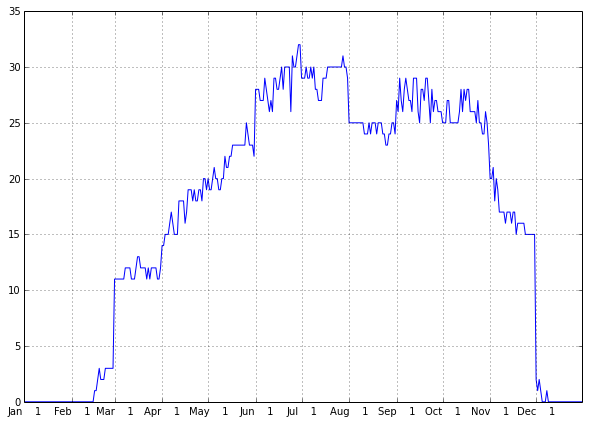

In [100]:
dic_lazy_station0 =  christmas_record(0)
pairs = dic_lazy_station0['TMIN']
count = np.array([0]*365)
for pair in pairs:
    this_data = df[df['measurement']=='TMIN'][df['station']==pair[0]][df['year']==pair[1]].iloc[0,3:].values
    data_nan = np.array(1-np.isnan(list(this_data)))
    if np.sum(data_nan) <10:
        continue 
    count = np.add(count,data_nan)
YearlyPlots(count)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy


If the stations lack of every measurement are the same stations: 
True True True True True True

387  records that lack of measurements:  [('USC00438644', 1981.0), ('USC00421020', 2013.0), ('USR0000CMEN', 2006.0), ('MX000003074', 1989.0), ('USW00093206', 1998.0), ('USC00160537', 2013.0), ('USC00243885', 2013.0), ('USW00022016', 2013.0), ('CA007028121', 1975.0), ('USC00164693', 1911.0), ('USC00082936', 1966.0), ('USC00484360', 1946.0), ('USW00012884', 1965.0), ('USC00300668', 1971.0), ('USW00012884', 1971.0), ('USS0010G08S', 2013.0), ('USC00088737', 1900.0), ('USC00102390', 1980.0), ('USC00391049', 1896.0), ('USC00243865', 1910.0), ('USC00041488', 1955.0), ('USC00243885', 1895.0), ('USS0006J29S', 2006.0), ('USC00200497', 2013.0), ('USC00384886', 1937.0), ('USC00450790', 1906.0), ('USC00294310', 1944.0), ('USC00300668', 1980.0), ('CA007024440', 1963.0), ('USC00031457', 1986.0), ('USC00468614', 1967.0), ('USC00160537', 2001.0), ('USC00460580', 1920.0), ('CA007030310', 1963.0), ('USR0000CB

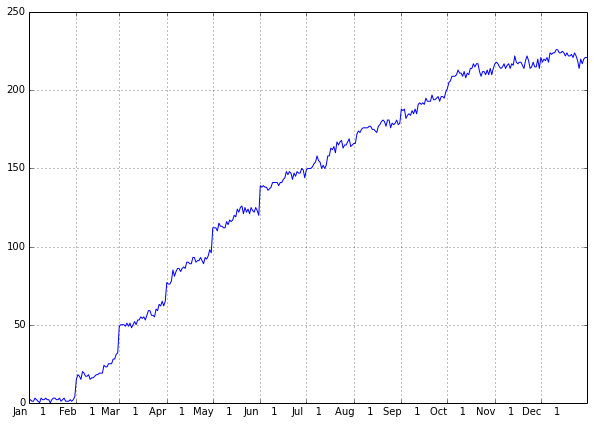

In [101]:
dic_lazy_station15 =  christmas_record(15)
pairs = dic_lazy_station15['TMIN']
count = np.array([0]*365)
for pair in pairs:
    this_data = df[df['measurement']=='TMIN'][df['station']==pair[0]][df['year']==pair[1]].iloc[0,3:].values
    data_nan = np.array(1-np.isnan(list(this_data)))
    if np.sum(data_nan) <10:
        continue 
    count = np.add(count,data_nan)
YearlyPlots(count)

In [102]:
# Find if the stations lack of record during 12.15 ~ 2.15 restricted to a subset of the stations
%pylab inline
from collections import defaultdict

def month_end_record(k):
    nan_dic = defaultdict(list)
    for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
        for i in range(0,len(m_df['TMIN'])):
            data = np.array([m_df['TMIN'].iloc[i,31],m_df['TMIN'].iloc[i,59]\
                                   ,m_df['TMIN'].iloc[i,90],m_df['TMIN'].iloc[i,120]\
                                  ,m_df['TMIN'].iloc[i,151],m_df['TMIN'].iloc[i,181]\
                                   ,m_df['TMIN'].iloc[i,212],m_df['TMIN'].iloc[i,243]\
                                  ,m_df['TMIN'].iloc[i,273],m_df['TMIN'].iloc[i,304]\
                                   ,m_df['TMIN'].iloc[i,334],m_df['TMIN'].iloc[i,365]])
            data_nancount = np.sum(1-np.isnan(list(data)))
            if data_nancount<=k:
                nan_dic[m].append((m_df['TMIN'].iloc[i,0],m_df['TMIN'].iloc[i,2]))
    print  'If the stations lack of measurements are the same stations: '
    for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
        print nan_dic[m] == nan_dic['TMIN'],
    print 
    print
    print len(list(set(nan_dic['TMIN']))),' stations that lack of record: ',list(set(nan_dic['TMIN'])), 
    return nan_dic

Populating the interactive namespace from numpy and matplotlib


If the stations lack of measurements are the same stations: 
True True True True True True

229  stations that lack of record:  [('USC00111841', 1893.0), ('USC00330083', 1947.0), ('USC00421020', 2013.0), ('USR0000CMEN', 2006.0), ('USC00035376', 1923.0), ('USC00051268', 1974.0), ('MX000003074', 1989.0), ('USC00474530', 2013.0), ('USC00023498', 1906.0), ('USW00012884', 2013.0), ('USC00241831', 2002.0), ('USR0000WFLO', 2000.0), ('USC00160537', 2013.0), ('USC00243885', 2013.0), ('USC00044204', 1935.0), ('USW00022016', 2013.0), ('USC00166794', 1942.0), ('CA001124110', 1995.0), ('USC00267123', 2013.0), ('CA004039000', 1918.0), ('USC00035376', 1920.0), ('USC00242867', 1956.0), ('MX000003074', 1990.0), ('USS0012M23S', 1989.0), ('USC00290125', 1987.0), ('MX000003074', 1982.0), ('USC00352697', 1948.0), ('USC00275995', 2013.0), ('USS0010G08S', 1988.0), ('CA007030310', 1969.0), ('USC00421168', 2013.0), ('USC00300668', 1971.0), ('USC00412769', 1947.0), ('USW00053183', 2013.0), ('USC00024299', 1948.

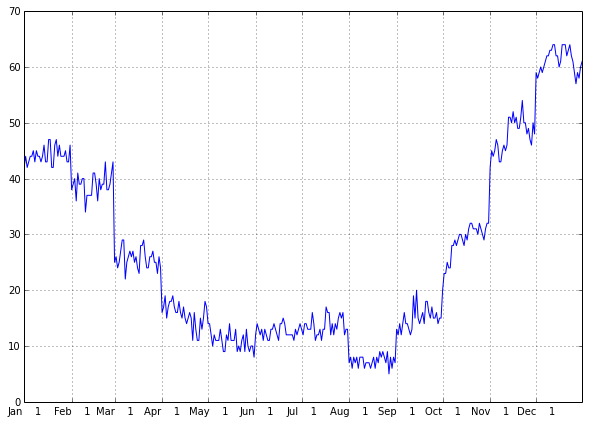

In [103]:
dic_month_end = month_end_record(3)
pairs = dic_month_end['TMIN']
count = np.array([0]*365)
for pair in pairs:
    this_data = df[df['measurement']=='TMIN'][df['station']==pair[0]][df['year']==pair[1]].iloc[0,3:].values
    data_nan = np.array(1-np.isnan(list(this_data)))
    if np.sum(data_nan) <10:
        continue 
    count = np.add(count,data_nan)
YearlyPlots(count)

### Instructor Feedback
This notebook does not contain enough text to give the explanation, describe the figures, and 
explain how the figures support the explanation.

No Extra Points
